In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Naissances par département

Fichiers naissance par département
Source https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262 
Puis Fichiers par départements de naissance, csv 12 mo

In [ ]:
names = pd.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2020_csv.zip", compression = "zip", sep = ";")

In [11]:
names.head()
names.tail()
names.sample(n = 10)

,sexe,preusuel,annais,dpt,nombre
1093838,1,MARCEAU,1901,51,5
469627,1,ERIK,1975,31,3
2843404,2,LEXIE,2018,51,3
1526138,1,SOFIANE,2008,33,14
258485,1,BRYAN,1993,77,16
693731,1,HENRI,1942,17,24
1819421,2,ALIZÉE,1995,76,6
1168470,1,MAX,1956,36,3
3118619,2,MARIE-THÉRÈSE,1906,974,3
1106672,1,MARIE,1915,74,5


In [33]:
names["dpt"].unique()
# Les 970 je suppose que ce sont les départements d'outre-mer ?
# On a quelques XX
names.columns

<bound method NDFrame.describe of          sexe        preusuel annais  dpt  nombre
0           1  _PRENOMS_RARES   1900   02       7
1           1  _PRENOMS_RARES   1900   04       9
2           1  _PRENOMS_RARES   1900   05       8
3           1  _PRENOMS_RARES   1900   06      23
4           1  _PRENOMS_RARES   1900   07       9
...       ...             ...    ...  ...     ...
3727545     2             ZYA   2013   44       4
3727546     2             ZYA   2013   59       3
3727547     2             ZYA   2017  974       3
3727548     2             ZYA   2018   59       3
3727550     2            ZYNA   2013   93       3

[3690309 rows x 5 columns]>

In [40]:
names = names.drop(names[names.dpt == 'XX'].index)
birthcount = pd.DataFrame(names.groupby(["annais", "dpt"]).nombre.sum())

In [57]:
birthcount = birthcount.reset_index()

In [67]:
birth_year = birthcount.groupby("annais").sum().reset_index()
birth_year

,annais,nombre
0,1900,393440
1,1901,431752
2,1902,443906
3,1903,446652
4,1904,456938
...,...,...
116,2016,584848
117,2017,571275
118,2018,561993
119,2019,556714


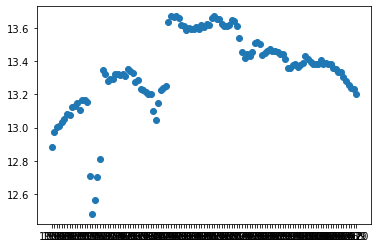

In [71]:
plt.scatter(birth_year.annais, np.log(birth_year.nombre))

# Délits

Crimes et délits enregistrés
Source : https://www.data.gouv.fr/fr/datasets/crimes-et-delits-enregistres-par-les-services-de-gendarmerie-et-de-police-depuis-2012/
Puis fichier xlsx (3.9 mo)

Noter que les infrastractions dans la BD correspondent à l'année et au lieu d'enregistrement, et pas forcément à l'année et au lieu où elles ont été commises
Il y a aussi eu des ruptures dans l'enregistrement des données 

!pip install openpyxl necessaire - sur mon PC en tout cas - pour pouvoir ouvrir le fichier xlsx
Le fichier comprend de nombreuses feuilles différentes : "Services PN 2012" & "Services GN 2012", 2012 pouvant être remplacé 
par les années de 2012 à 2020

In [32]:
delits = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/d792092f-b1f7-4180-a367-d043200c1520", 
                      sheet_name = "Services PN 2012",
                      usecols = "B:ADW",
                      skiprows = [1,2])

In [36]:
delits.head()
delits.sample(n=10)
delits.tail()

,Départements,01,01.1,01.2,02,02.1,02.2,02.3,02.4,03,...,974.1,974.2,974.3,974.4,976,976.1,987,987.1,988,988.1
20,Vols avec armes blanches contre des particulie...,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,2,0,0,0,3
104,Fraudes fiscales,0,0,1,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
96,Index non utilisé,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,Infractions à la législation sur les chèques,0,1,8,0,4,1,6,3,21,...,0,2,22,2,0,9,0,1,0,24
42,Autres vols simples contre des particuliers da...,0,259,65,113,137,187,320,66,0,...,549,67,280,85,0,103,0,549,6,0
58,Délits de débits de boissons et infraction à l...,0,3,0,0,2,0,2,0,0,...,0,1,1,9,0,1,0,0,0,16
38,Vols simples sur chantier,0,7,4,3,2,2,12,2,11,...,12,16,13,14,0,2,0,7,0,13
39,Vols simples sur exploitations agricoles,0,0,0,0,1,0,0,0,0,...,0,2,13,0,0,1,0,0,0,0
40,Autres vols simples contre des établissements ...,3,72,30,25,0,44,101,30,7,...,155,14,82,23,0,26,1,27,1,157
78,Atteintes à l'environnement,0,0,2,2,0,3,0,0,0,...,1,1,1,8,0,2,0,0,0,1


Il faudrait réunnir les délits par départements, vu qu'ils sont actuellement réunis selon une autre classification

# Musées

Liste et localisation des musées en France
https://www.data.gouv.fr/fr/datasets/liste-et-localisation-des-musees-de-france/
Puis liste des musées de france au 31/12/2017 (238.3ko)

In [40]:
musees = pd.read_excel("https://www.data.gouv.fr/fr/datasets/r/22df4a13-72d8-4b34-940e-8aec297b5ded",
                      usecols = "A,B,E:I")

In [41]:
musees.head()

,NEW REGIONS,NOMDEP,ID MUSEE,NOM DU MUSEE,ADR,CP,VILLE
0,AUVERGNE-RHÔNE-ALPES,AIN,0105302,Musée Départemental des Pays De l'Ain,"34, rue du Général Delestraint",1000.0,BOURG-EN-BRESSE
1,AUVERGNE-RHÔNE-ALPES,AIN,0105301,Musée du Brou,"Monastère Royal de Brou\n63, Boulevard de Brou",1000.0,BOURG-EN-BRESSE
2,AUVERGNE-RHÔNE-ALPES,AIN,0106401,Musée de la Société d'Histoire et d'Archéologie,Mairie,1470.0,BRIORD
3,AUVERGNE-RHÔNE-ALPES,AIN,0119201,Musée Archéologique,Place de l'Eglise,1580.0,IZERNORE
4,AUVERGNE-RHÔNE-ALPES,AIN,0121801,Musée du Bugey-Valmorey,Maison Renaissance,1260.0,LOCHIEU


In [47]:
musees.groupby("NOMDEP").size()
# Permet d'avoir le nombre de musées par département, bien qu'il soit sous forme de nom et pas de numéro

,0
NOMDEP,
AIN,14
AISNE,15
ALLIER,9
ALPES DE HAUTE PROVENCE,9
ALPES-MARITIMES,33
